In [3]:
#https://www.kaggle.com/code/ranja7/clustering-with-dbscan-compare-with-gmm/notebook?scriptVersionId=103585335
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msn

from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import plotly.express as px




import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('iocs-export.csv', delimiter=';', skiprows=0, low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33790 entries, 0 to 33789
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ip               33790 non-null  object
 1   port             33790 non-null  int64 
 2   protocol         33790 non-null  object
 3   version          33790 non-null  object
 4   xorkey           33790 non-null  int64 
 5   domains          33784 non-null  object
 6   host_header      9865 non-null   object
 7   first_seen       33790 non-null  object
 8   last_seen        33790 non-null  object
 9   delta_days       33790 non-null  int64 
 10  country          33790 non-null  object
 11  asn              33790 non-null  int64 
 12  org              33790 non-null  object
 13  user_agent       33787 non-null  object
 14  spawnto_x86      33790 non-null  object
 15  spawnto_x64      33790 non-null  object
 16  procinj_execute  33790 non-null  object
 17  submituri        33789 non-null

In [7]:
px.scatter(data, x = "country", y = "delta_days", color = 'is_modified', marginal_x = "histogram", marginal_y = "histogram")

In [14]:
final_df = pd.DataFrame()

In [15]:
data.head(5)

ip  port protocol                            version  xorkey  \
0     81.95.5.146   443    https   Cobalt Strike 3.6 (Dec 08, 2016)     105   
1  122.116.41.237    80     http   Cobalt Strike 3.6 (Dec 08, 2016)     105   
2   51.255.42.170    80      dns   Cobalt Strike 3.4 (Jul 29, 2016)     105   
3    51.38.187.74   443    https   Cobalt Strike 3.8 (May 23, 2017)     105   
4   54.147.59.212    80     http  Cobalt Strike 3.10 (Dec 11, 2017)     105   

                                             domains   host_header first_seen  \
0                                        81.95.5.146           NaN   04/07/18   
1                                     122.116.41.237           NaN   04/07/18   
2  cdn.incdigest.com, freepics.incdigest.com, pro...           NaN   04/07/18   
3                                       51.38.187.74           NaN   04/07/18   
4                          ww2.foodprepsolutions.com  www.imdb.com   04/07/18   

  last_seen  delta_days  ...     asn                                org  \
0  26/11/18         145  ...  201011           AS33891 Netzbetrieb GmbH   
1  04/07/18           1  ...    3462  Data Communication Business Group   
2  05/12/18         154  ...   16276                            OVH SAS   
3  04/07/18           1  ...   16276                            OVH SAS   
4  16/08/18          43  ...   14618                         AMAZON-AES   

                                          user_agent  \
0  Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....   
1  Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...   
2  Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...   
3  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
4  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   

                      spawnto_x86                      spawnto_x64  \
0  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
1  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
2                               0                                0   
3  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
4  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   

  procinj_execute                                          submituri  \
0               0  /safebrowsing/rd/CINnu27nLO8hbHdfgmUtc2ihdmFyE...   
1               0                                        /submit.php   
2               0                                        /submit.php   
3               0                                        /submit.php   
4               0                                   /name/nm0954753/   

  watermark_hex   modifications is_modified  
0           0x0  modified_trial        True  
1           0x0          normal       False  
2           0x0          normal       False  
3           0x0          normal       False  
4    0x77254a2e          normal       False  

[5 rows x 21 columns]

In [16]:
data.columns

Index(['ip', 'port', 'protocol', 'version', 'xorkey', 'domains', 'host_header',
       'first_seen', 'last_seen', 'delta_days', 'country', 'asn', 'org',
       'user_agent', 'spawnto_x86', 'spawnto_x64', 'procinj_execute',
       'submituri', 'watermark_hex', 'modifications', 'is_modified'],
      dtype='object')

In [17]:
le = LabelEncoder()
data['ip'] = le.fit_transform(data['ip']).astype('str')
data['port'] = le.fit_transform(data['port']).astype('str')
data['protocol'] = le.fit_transform(data['protocol']).astype('str')
data['version'] = le.fit_transform(data['version']).astype('str')
data['xorkey'] = le.fit_transform(data['xorkey']).astype('str')
data['domains'] = le.fit_transform(data['domains']).astype('str')
data['host_header'] = le.fit_transform(data['host_header']).astype('str')
data['first_seen'] = le.fit_transform(data['first_seen']).astype('str')
data['last_seen'] = le.fit_transform(data['last_seen']).astype('str')
data['country'] = le.fit_transform(data['country']).astype('str')
data['asn'] = le.fit_transform(data['asn']).astype('str')
data['org'] = le.fit_transform(data['org']).astype('str')
data['user_agent'] = le.fit_transform(data['user_agent']).astype('str')
data['spawnto_x86'] = le.fit_transform(data['spawnto_x86']).astype('str')
data['spawnto_x64'] = le.fit_transform(data['spawnto_x64']).astype('str')
data['procinj_execute'] = le.fit_transform(data['procinj_execute']).astype('str')
data['submituri'] = le.fit_transform(data['submituri']).astype('str')
data['watermark_hex'] = le.fit_transform(data['watermark_hex']).astype('str')
data['modifications'] = le.fit_transform(data['modifications']).astype('str')


<AxesSubplot: >

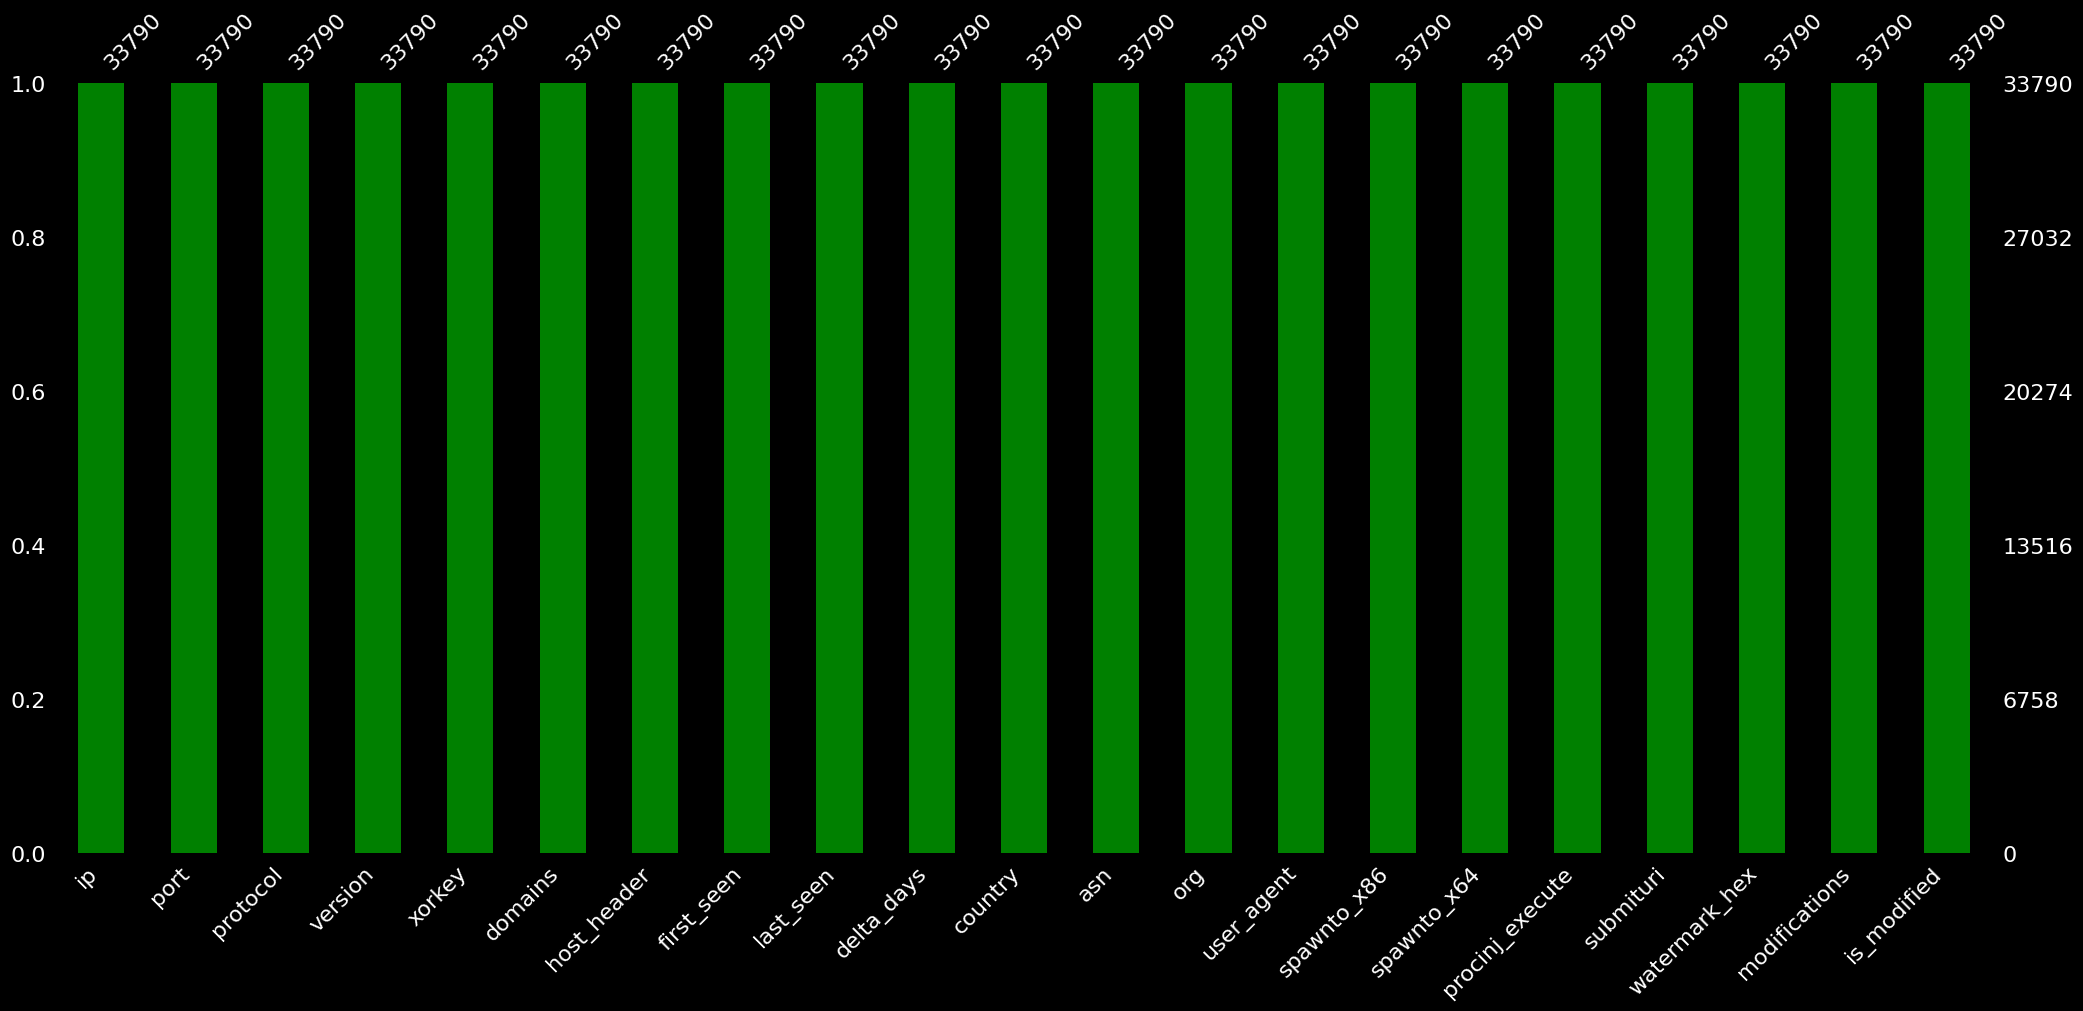

In [18]:
msn.bar(data, color = 'green')


In [19]:

data['host_header'].fillna(data['host_header'].mean(), inplace = True)
#data['gender'].fillna(data['gender'].mode(), inplace = True)
#data['profession'].fillna(data['profession'].mode(), inplace = True)
data['user_agent'].fillna(data['user_agent'].mean(), inplace = True)
data['submituri'].fillna(data['submituri'].mean(), inplace = True)
#data['noOfKids'].fillna(0, inplace = True)
#data['pastStays1y'].fillna(0, inplace = True)


In [20]:
df_column_names = list(data.columns)
x = data.loc[:, :].values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled, columns = df_column_names)
df_normalized.head()

ip     port  protocol   version  xorkey   domains  host_header  \
0  0.959967  0.06250       1.0  0.500000    0.56  0.531918     1.000000   
1  0.155877  0.03125       0.5  0.500000    0.56  0.115283     1.000000   
2  0.855468  0.03125       0.0  0.388889    0.56  0.623822     1.000000   
3  0.855577  0.06250       1.0  0.611111    0.56  0.482304     1.000000   
4  0.878538  0.03125       0.5  0.000000    0.56  0.964715     0.934053   

   first_seen  last_seen  delta_days  ...       asn       org  user_agent  \
0         0.1   0.825503    0.128342  ...  0.847074  0.046348    0.590018   
1         0.1   0.093960    0.000000  ...  0.037234  0.237360    0.049911   
2         0.1   0.161074    0.136364  ...  0.182181  0.644663    0.820856   
3         0.1   0.093960    0.000000  ...  0.182181  0.644663    0.096257   
4         0.1   0.510067    0.037433  ...  0.168883  0.029494    0.098930   

   spawnto_x86  spawnto_x64  procinj_execute  submituri  watermark_hex  \
0     0.656463     0.621160              0.0   0.790095       0.000000   
1     0.656463     0.621160              0.0   0.875057       0.000000   
2     0.911565     0.897611              0.0   0.875057       0.000000   
3     0.656463     0.621160              0.0   0.875057       0.000000   
4     0.656463     0.621160              0.0   0.643798       0.860438   

   modifications  is_modified  
0         0.2500          1.0  
1         0.8125          0.0  
2         0.8125          0.0  
3         0.8125          0.0  
4         0.8125          0.0  

[5 rows x 21 columns]

In [21]:
df_normalized.describe().T

count      mean       std  min       25%       50%  \
ip               33790.0  0.504379  0.287453  0.0  0.259572  0.501554   
port             33790.0  0.055183  0.064503  0.0  0.031250  0.062500   
protocol         33790.0  0.737925  0.312559  0.0  0.500000  1.000000   
version          33790.0  0.672591  0.244133  0.0  0.611111  0.722222   
xorkey           33790.0  0.143321  0.244331  0.0  0.000000  0.000000   
domains          33790.0  0.482040  0.289225  0.0  0.237569  0.471960   
host_header      33790.0  0.867513  0.262217  0.0  0.894717  1.000000   
first_seen       33790.0  0.505749  0.289502  0.0  0.246667  0.506667   
last_seen        33790.0  0.507469  0.293872  0.0  0.241611  0.489933   
delta_days       33790.0  0.023234  0.050333  0.0  0.000000  0.004456   
country          33790.0  0.585359  0.339119  0.0  0.259259  0.592593   
asn              33790.0  0.395455  0.248299  0.0  0.184840  0.364362   
org              33790.0  0.389395  0.288949  0.0  0.070225  0.380618   
user_agent       33790.0  0.557431  0.325911  0.0  0.156863  0.695187   
spawnto_x86      33790.0  0.617632  0.127480  0.0  0.656463  0.656463   
spawnto_x64      33790.0  0.582822  0.126160  0.0  0.621160  0.621160   
procinj_execute  33790.0  0.648330  0.364780  0.0  0.217082  0.886121   
submituri        33790.0  0.657602  0.290069  0.0  0.493412  0.875057   
watermark_hex    33790.0  0.268730  0.319298  0.0  0.000195  0.036357   
modifications    33790.0  0.693966  0.354263  0.0  0.250000  0.812500   
is_modified      33790.0  0.728174  0.444907  0.0  0.000000  1.000000   

                      75%  max  
ip               0.754677  1.0  
port             0.062500  1.0  
protocol         1.000000  1.0  
version          0.833333  1.0  
xorkey           0.560000  1.0  
domains          0.726755  1.0  
host_header      1.000000  1.0  
first_seen       0.740000  1.0  
last_seen        0.758389  1.0  
delta_days       0.024064  1.0  
country          0.962963  1.0  
asn              0.555851  1.0  
org              0.644663  1.0  
user_agent       0.853832  1.0  
spawnto_x86      0.656463  1.0  
spawnto_x64      0.621160  1.0  
procinj_execute  0.886121  1.0  
submituri        0.875057  1.0  
watermark_hex    0.545348  1.0  
modifications    0.937500  1.0  
is_modified      1.000000  1.0

<AxesSubplot: >

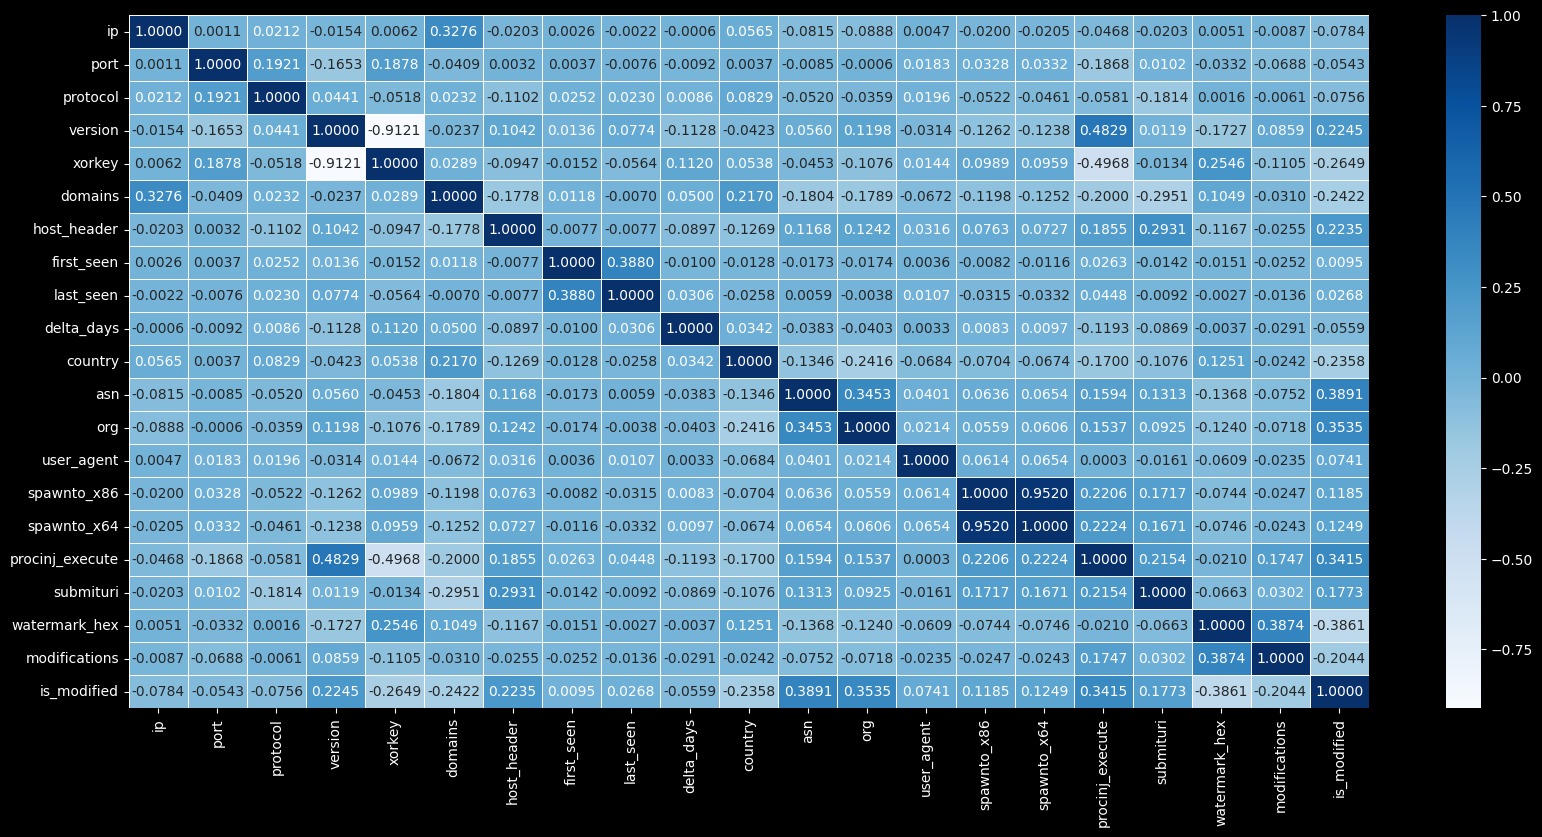

In [22]:
plt.figure(figsize = (20, 9)) #default pearson
sns.heatmap(df_normalized.corr(), annot = True, cmap = 'Blues', fmt = '.4f',linewidths = 0.6)

In [23]:
print(df_normalized.columns.to_list())

['ip', 'port', 'protocol', 'version', 'xorkey', 'domains', 'host_header', 'first_seen', 'last_seen', 'delta_days', 'country', 'asn', 'org', 'user_agent', 'spawnto_x86', 'spawnto_x64', 'procinj_execute', 'submituri', 'watermark_hex', 'modifications', 'is_modified']


<AxesSubplot: >

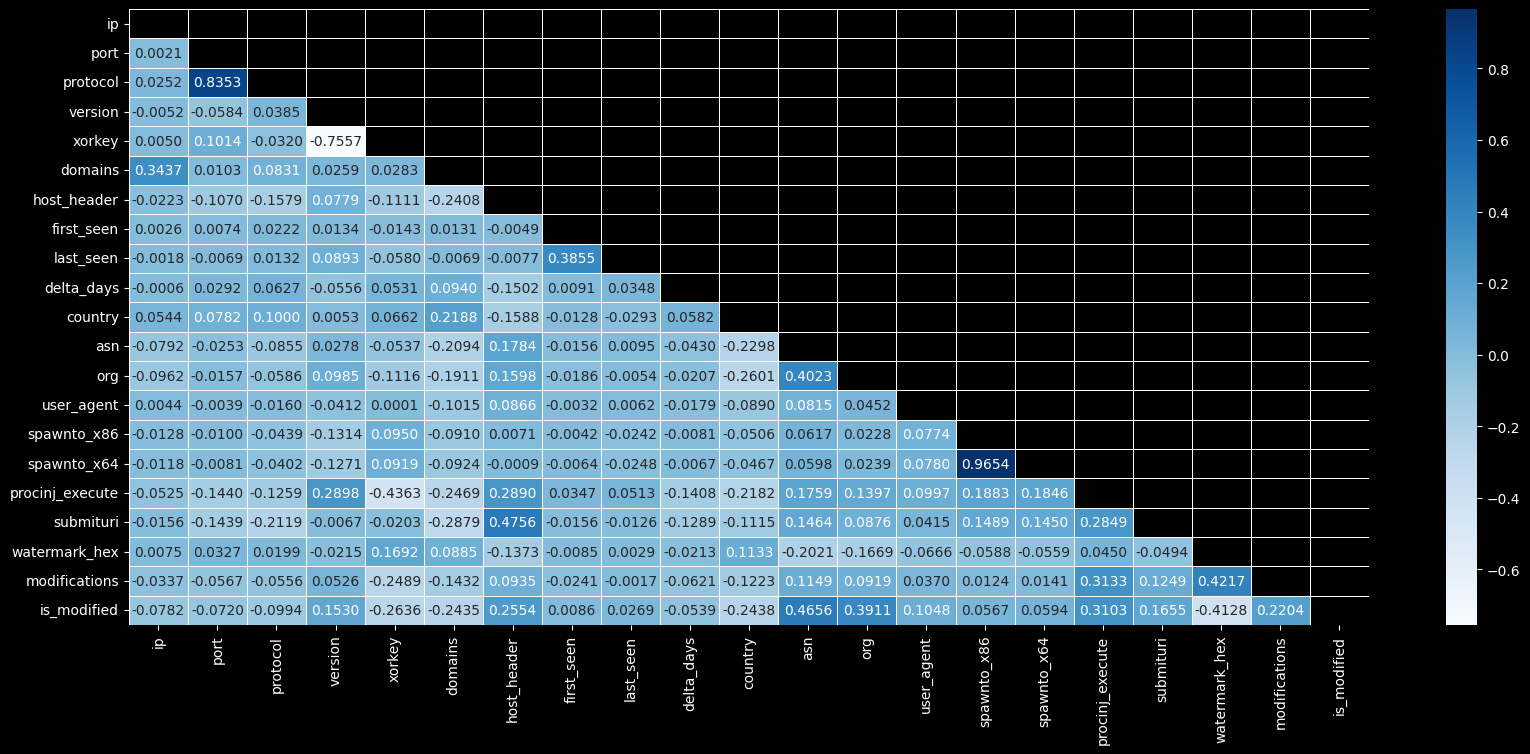

In [24]:
#correlation matrix

plt.figure(figsize = (20, 8)) 
mask = np.triu(np.ones_like(df_normalized.corr(method = 'spearman')))
sns.heatmap(df_normalized.corr(method = 'spearman'), annot = True, cmap = 'Blues', fmt = '.4f',linewidths = 0.6, mask = mask)

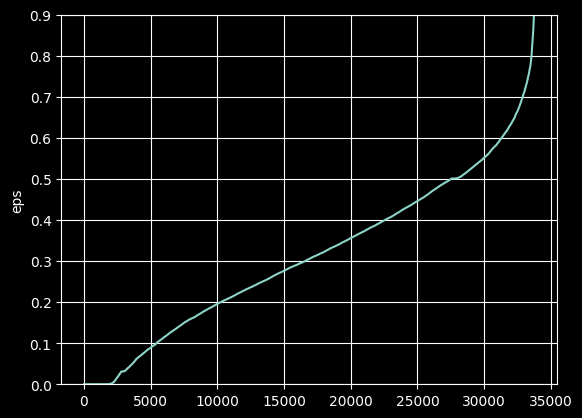

In [25]:
neighbors = NearestNeighbors(n_neighbors = 50)
neighbors_fit = neighbors.fit(df_normalized)
distances, indices = neighbors_fit.kneighbors(df_normalized)

distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.ylim(0, 0.9)
plt.plot(distances)
plt.ylabel('eps')
plt.grid()

In [26]:
model = DBSCAN(eps = 0.9, min_samples = 50) #default parameters are eps = 0.5, min_samples = 5, metric = 'euclidean'
model.fit_predict(df_normalized)

array([1, 0, 0, ..., 1, 1, 1])

In [27]:
DBSCAN_method = pd.DataFrame(model.labels_)

final_df['DBSCAN'] = DBSCAN_method
final_df.head(5)

DBSCAN
0       1
1       0
2       0
3       0
4       0

In [28]:
comp = PCA(n_components = 5).fit_transform(df_normalized)
dff = pd.DataFrame(comp, columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])
final_df = final_df.join(dff)
final_df.head(5)

DBSCAN      PCA1      PCA2      PCA3      PCA4      PCA5
0       1 -0.020641  0.905572  0.183980  0.049734 -0.060135
1       0  0.820802  0.226753  0.631394 -0.561842  0.425743
2       0  0.624090  0.349027  0.897546 -0.315750  0.007045
3       0  0.686355  0.258185  0.469138 -0.436829  0.026886
4       0  1.447592  0.130366  0.357351 -0.368618  0.494591

Text(0.5, 1.0, 'DBSCAN')

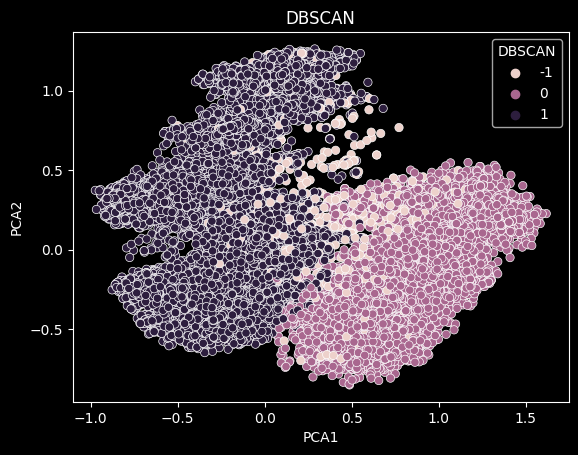

In [29]:
#plt.figure(figsize = (12, 6))
sns.scatterplot(x = final_df["PCA1"], y = final_df["PCA2"], hue = final_df["DBSCAN"], data = final_df) #style, palette could be used
#plt.grid()
plt.title('DBSCAN')

In [30]:
px.scatter(final_df, x = "PCA1", y = "PCA2", color = 'DBSCAN',title = 'DBSCAN Clustering')

In [31]:
#len(final_df['DBSCAN'].unique())

clusters = pd.DataFrame(final_df['DBSCAN'].value_counts())
clusters.head()

DBSCAN
 1   24022
 0    8729
-1    1039

In [32]:
labels = model.labels_
print('Compactness= {}'.format(metrics.silhouette_score(df_normalized, labels)))

Compactness= 0.1727947814015202


In [33]:
from sklearn.mixture import GaussianMixture as GMM 

In [34]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(df_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)


P1        P2
0 -0.020660  0.905652
1  0.820812  0.226690

In [35]:
gm = GMM(n_components = 2, random_state = 0)
gm.fit(X_principal)

#probs = gmm.predict_proba(df_normalized)

GaussianMixture(n_components=2, random_state=0)

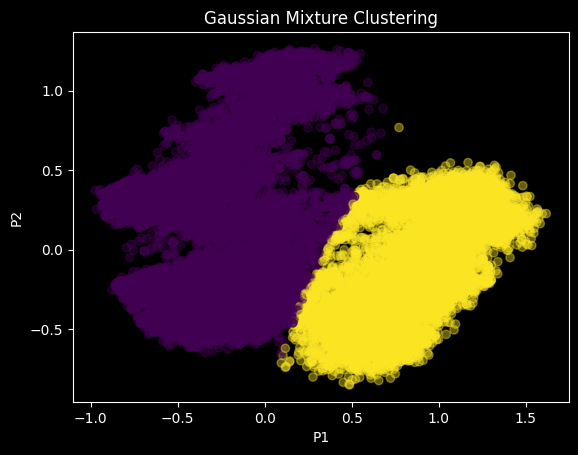

In [36]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GMM(n_components = 2).fit_predict(X_principal), alpha = 0.4) 
plt.xlabel('P1')
plt.ylabel('P2')
plt.title('Gaussian Mixture Clustering')
plt.show() 

In [37]:
gmm = GMM(n_components = 2, covariance_type = 'full', random_state = 0).fit(df_normalized)
labels = gmm.predict(df_normalized)
#probs = gmm.predict_proba(df_normalized)
#size = probs.max(1) ** 2  #square emphasizes differences
#plt.scatter('P1', 'P2', c = labels, s = size)

ll = pd.DataFrame(labels)
ll.value_counts()

1    24605
0     9185
dtype: int64

In [38]:
from pyod.utils.utility import standardizer

In [39]:
df1 = pd.read_csv('iocs-export.csv', delimiter=';', skiprows=0, low_memory=False)
y = df1['modifications']


y.loc[(df1['modifications'] == 'modified_trial')] = 0.0
y.loc[(df1['modifications'] == 'normal')] = 1.0
y.loc[(df1['modifications'] == 'bad_watermark+reused_watermark')] = 2.0
y.loc[(df1['modifications'] == 'modified_trial+bad_watermark+reused_watermark')] = 3.0
y.loc[(df1['modifications'] == 'modified_trial+bad_watermark')] = 4.0
y.loc[(df1['modifications'] == 'modified_trial+reused_watermark')] = 5.0
y.loc[(df1['modifications'] == 'reused_watermark')] = 6.0
y.loc[(df1['modifications'] == 'bad_watermark+reused_watermark+reused_pubkey')] = 7.0
y.loc[(df1['modifications'] == 'reused_watermark+reused_pubkey')] = 8.0
y.loc[(df1['modifications'] == 'bad_watermark')] = 9.0
y.loc[(df1['modifications'] == 'modified_xorkey')] = 10.0
y.loc[(df1['modifications'] == 'modified_xorkey+reused_watermark')] = 11.0
y.loc[(df1['modifications'] == 'modified_xorkey+bad_watermark+reused_watermark')] = 12.0
y.loc[(df1['modifications'] == 'modified_xorkey+reused_watermark+reused_pubkey')] = 13.0
y.loc[(df1['modifications'] == 'modified_xorkey+bad_watermark+reused_watermark+reused_pubkey')] = 14.0
y.loc[(df1['modifications'] == 'reused_pubkey')] = 15.0
y.loc[(df1['modifications'] == 'bad_watermark+reused_watermark+bad_watermarkhash')] = 16.0

#y.value_counts()



/var/folders/44/13990_rx4yl_pbnl4hn54mdh0000gn/T/ipykernel_4796/3361510731.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/44/13990_rx4yl_pbnl4hn54mdh0000gn/T/ipykernel_4796/3361510731.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/44/13990_rx4yl_pbnl4hn54mdh0000gn/T/ipykernel_4796/3361510731.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/44/13990_rx4yl_pbnl4hn54mdh0000gn/T/ipykernel

In [40]:
y1 = np.array(y)
y_norm = standardizer(y1.reshape(-1,1))

In [41]:
df_normalized.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33790 entries, 0 to 33789
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ip               33790 non-null  float64
 1   port             33790 non-null  float64
 2   protocol         33790 non-null  float64
 3   version          33790 non-null  float64
 4   xorkey           33790 non-null  float64
 5   domains          33790 non-null  float64
 6   host_header      33790 non-null  float64
 7   first_seen       33790 non-null  float64
 8   last_seen        33790 non-null  float64
 9   delta_days       33790 non-null  float64
 10  country          33790 non-null  float64
 11  asn              33790 non-null  float64
 12  org              33790 non-null  float64
 13  user_agent       33790 non-null  float64
 14  spawnto_x86      33790 non-null  float64
 15  spawnto_x64      33790 non-null  float64
 16  procinj_execute  33790 non-null  float64
 17  submituri   

In [42]:
from pyod.models.pca import PCA as PCA_out
from pythresh.thresholds.dsn import DSN

In [43]:
clf = PCA_out(n_components = 5) #10 features reduced to 5
clf.fit(df_normalized)
scores = clf.decision_scores_

thres = DSN(metric = 'BHT') #distance metric:Measure of similarity between two probability distributions, returns the amount of overlap between them
labels = thres.eval(scores)

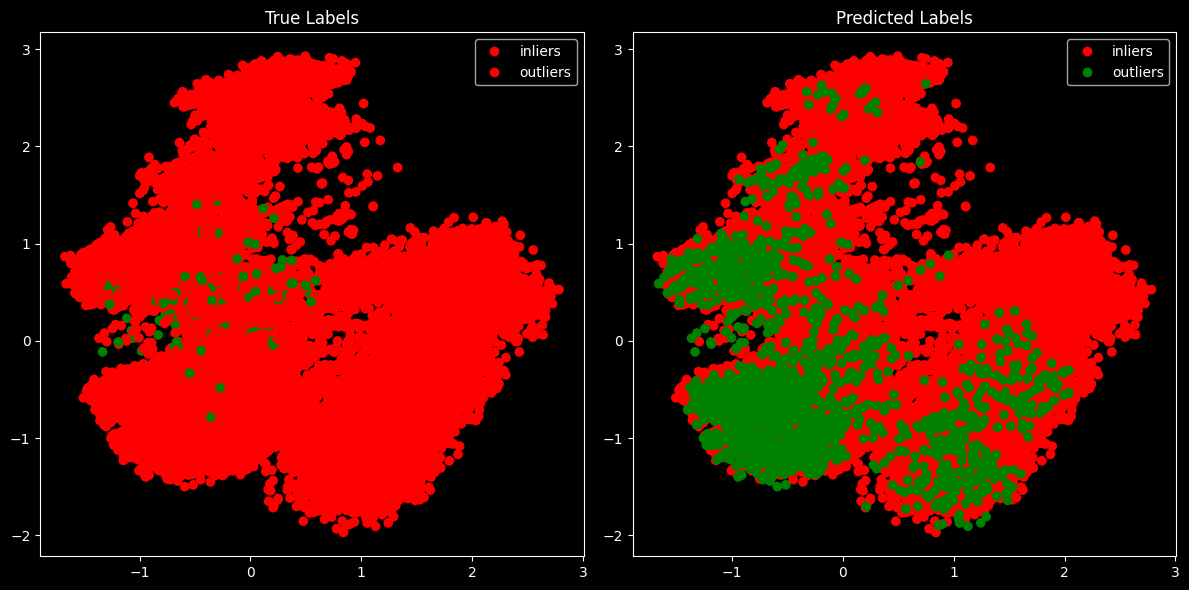

In [44]:
from matplotlib.colors import ListedColormap

reduct = PCA(n_components = 2, whiten = True)
data = reduct.fit_transform(df_normalized)

colors = ListedColormap(['red', 'green'])
classes = ['inliers','outliers']

figure, ax = plt.subplots(1, 2,figsize = (12,6))

scatter1 = ax[0].scatter(data[:,0], data[:,1], c = y_norm.astype(int), cmap = colors)
ax[0].set_title("True Labels")
ax[0].legend(handles = scatter1.legend_elements()[0], labels = classes)
scatter2 = ax[1].scatter(data[:,0], data[:,1], c = labels, cmap = colors)
ax[1].set_title("Predicted Labels")
ax[1].legend(handles = scatter2.legend_elements()[0], labels = classes)
plt.tight_layout()
plt.show()
